<a href="https://colab.research.google.com/github/ebinjosephx/project/blob/main/project/bar_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(779, 9)
Epoch 1/100
55/55 [==============================] - 0s 888us/step - loss: 1.5670
Epoch 2/100
55/55 [==============================] - 0s 909us/step - loss: 0.9507
Epoch 3/100
55/55 [==============================] - 0s 981us/step - loss: 0.7937
Epoch 4/100
55/55 [==============================] - 0s 1ms/step - loss: 0.7213
Epoch 5/100
55/55 [==============================] - 0s 1ms/step - loss: 0.6682
Epoch 6/100
55/55 [==============================] - 0s 884us/step - loss: 0.6267
Epoch 7/100
55/55 [==============================] - 0s 1ms/step - loss: 0.5972
Epoch 8/100
55/55 [==============================] - 0s 1ms/step - loss: 0.5739
Epoch 9/100
55/55 [==============================] - 0s 1ms/step - loss: 0.5494
Epoch 10/100
55/55 [==============================] - 0s 1ms/step - loss: 0.5297
Epoch 11/100
55/55 [==============================] - 0s 1ms/step - loss: 0.5129
Epoch 12/100
55/55 [==============================] - 0s 1ms/step - loss: 0.5032
Epoch 13/100
55/55 [

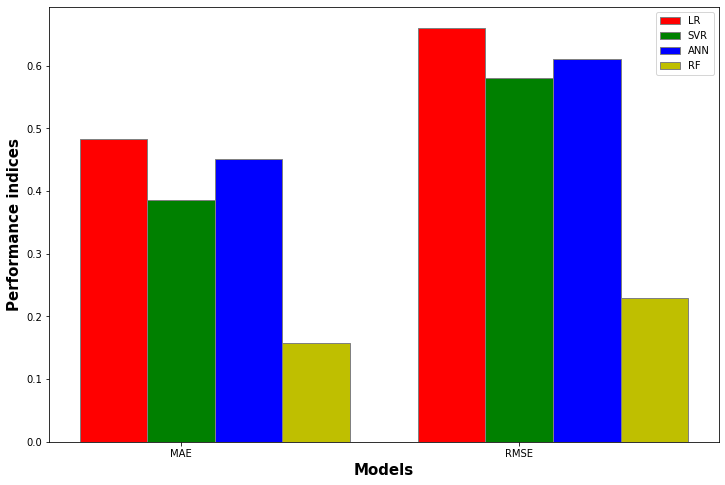

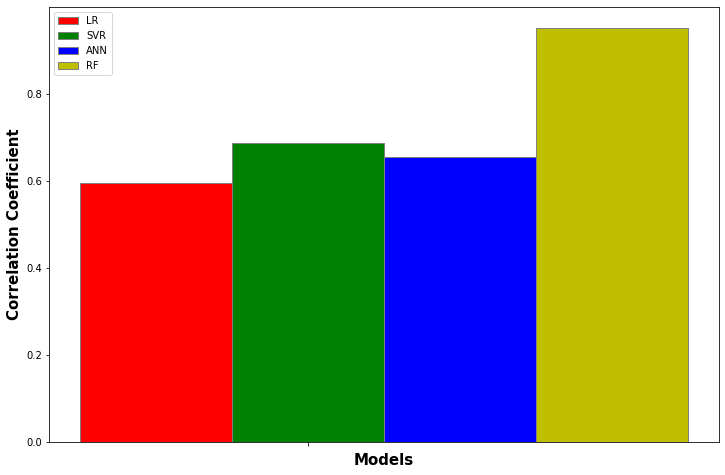

In [7]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = pd.read_excel('/content/Copy of Pro-data4.xlsx')
sc = StandardScaler()
x = data.iloc[:,1:10].values
x = pd.DataFrame(sc.fit_transform(x))
y = data.iloc[:,13].values

print(x.shape)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets 
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.30, random_state = 42)

# import the regressor
from sklearn.linear_model import LinearRegression
  
 # create regressor object
regressor_lr = LinearRegression()
  
# fit the regressor with x and y data
regressor_lr.fit(x, y)
y_pred_lr=regressor_lr.predict(x_test)

from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'rbf')
regressor_svr.fit(x, y)

y_pred_svr=regressor_svr.predict(x_test)

import keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim = 9))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size = 10, epochs = 100)

y_pred_ann = model.predict(x_test)

# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor_rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor_rf.fit(x, y)
y_pred_rf=regressor_rf.predict(x_test)





from sklearn import metrics
mae_lr=metrics.mean_absolute_error(y_test, y_pred_lr)
mae_svr=metrics.mean_absolute_error(y_test, y_pred_svr)
mae_ann=metrics.mean_absolute_error(y_test, y_pred_ann)
mae_rf=metrics.mean_absolute_error(y_test, y_pred_rf)

rmse_lr=np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))
rmse_svr=np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr))
rmse_ann=np.sqrt(metrics.mean_squared_error(y_test, y_pred_ann))
rmse_rf=np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))

r_lr=metrics.r2_score(y_test, y_pred_lr)
r_svr=metrics.r2_score(y_test, y_pred_svr)
r_ann=metrics.r2_score(y_test, y_pred_ann)
r_rf=metrics.r2_score(y_test, y_pred_rf)



# set width of bar
barWidth = 0.20
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
LR = [mae_lr,rmse_lr]
SVR = [mae_svr,rmse_svr]
ANN = [mae_ann,rmse_ann]
RF = [mae_rf,rmse_rf]
# Set position of bar on X axis
br1 = np.arange(len(LR))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot
plt.bar(br1,LR, color ='r', width = barWidth,
        edgecolor ='grey', label ='LR')
plt.bar(br2,SVR, color ='g', width = barWidth,
        edgecolor ='grey', label ='SVR')
plt.bar(br3,ANN, color ='b', width = barWidth,
        edgecolor ='grey', label ='ANN')
plt.bar(br4,RF, color ='y', width = barWidth,
        edgecolor ='grey', label ='RF') 

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Performance indices', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(LR))],
        ['MAE','RMSE'])
 
plt.legend()
plt.show()

# set width of bar
barWidth = 0.20
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
LR = [r_lr]
SVR = [r_svr]
ANN = [r_ann]
RF = [r_rf]
# Set position of bar on X axis
br1 = np.arange(len(LR))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot
plt.bar(br1,LR, color ='r', width = barWidth,
        edgecolor ='grey', label ='LR')
plt.bar(br2,SVR, color ='g', width = barWidth,
        edgecolor ='grey', label ='SVR')
plt.bar(br3,ANN, color ='b', width = barWidth,
        edgecolor ='grey', label ='ANN')
plt.bar(br4,RF, color ='y', width = barWidth,
        edgecolor ='grey', label ='RF') 

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Correlation Coefficient', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(LR))],
        [])
 
plt.legend()
plt.show()
